# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = f"{url}&units={units}&APPID={weather_api_key}"
    city_url = city_url+ "&q=" + city.replace(" ","+")
    print(city_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=souillac
Processing Record 1 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=claveria
Processing Record 2 of Set 1 | claveria
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=vaini
Processing Record 3 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=puerto+leguizamo
Processing Record 4 of Set 1 | puerto leguizamo
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=barrow
Processing Record 5 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?&units=Metric&APPID=e6b74be7ffeada883285d30bbca92b18&q=kutum
Processing Record 6 of Set 1 | kutum
http://api.openweathermap.org/data

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.5167,57.5167,26.21,69,40,3.09,MU,1676227239
1,claveria,18.6074,121.0832,22.97,86,3,2.72,PH,1676227239
2,vaini,-21.2000,-175.2000,25.09,94,75,2.06,TO,1676227240
3,puerto leguizamo,-0.1934,-74.7819,32.93,46,55,1.62,CO,1676227240
4,barrow,71.2906,-156.7887,-26.99,76,0,6.69,US,1676227241


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,26.21,69,40,3.09,MU,1676227239
1,claveria,18.6074,121.0832,22.97,86,3,2.72,PH,1676227239
2,vaini,-21.2000,-175.2000,25.09,94,75,2.06,TO,1676227240
3,puerto leguizamo,-0.1934,-74.7819,32.93,46,55,1.62,CO,1676227240
4,barrow,71.2906,-156.7887,-26.99,76,0,6.69,US,1676227241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

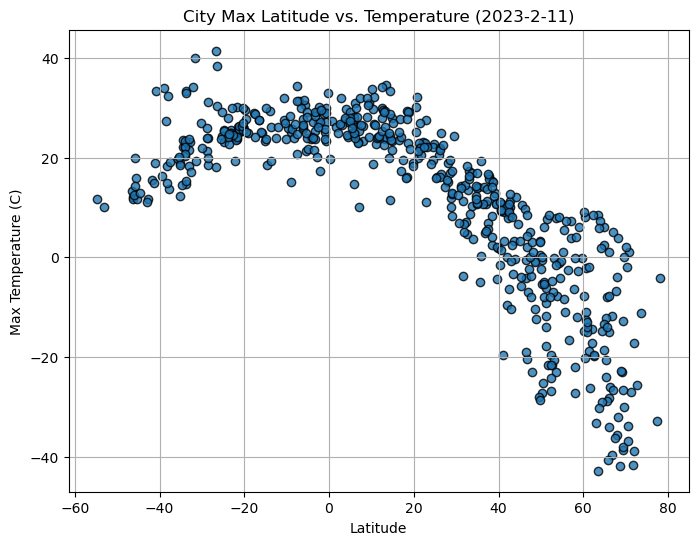

In [34]:
# Build scatter plot for latitude vs. temperature
fig1, ax1 = plt.subplots(figsize = (8, 6))
ax1.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-2-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

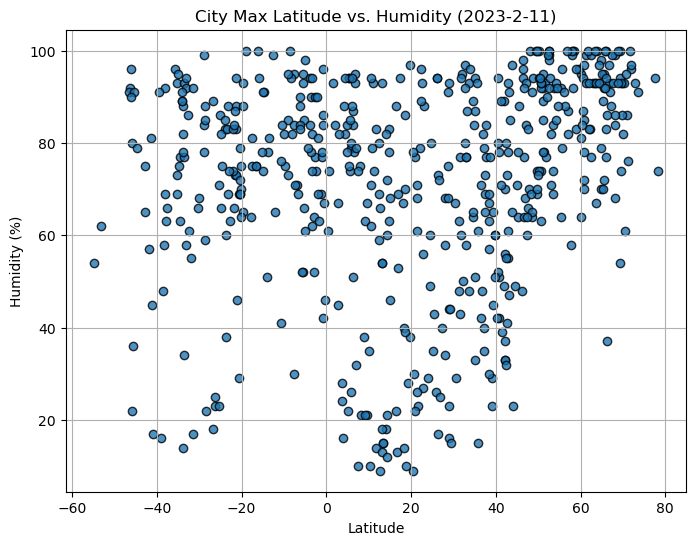

In [35]:
# Build the scatter plots for latitude vs. humidity
fig2, ax2 = plt.subplots(figsize = (8, 6))
ax2.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-2-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

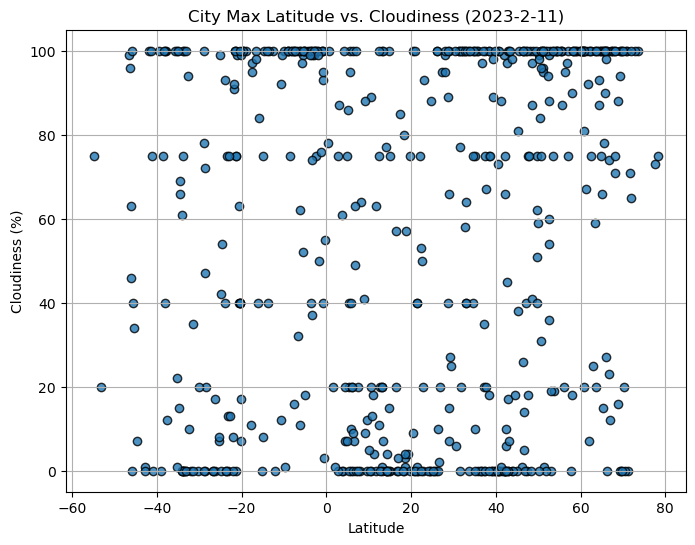

In [36]:
# Build the scatter plots for latitude vs. cloudiness
fig3, ax3 = plt.subplots(figsize = (8, 6))
ax3.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-2-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

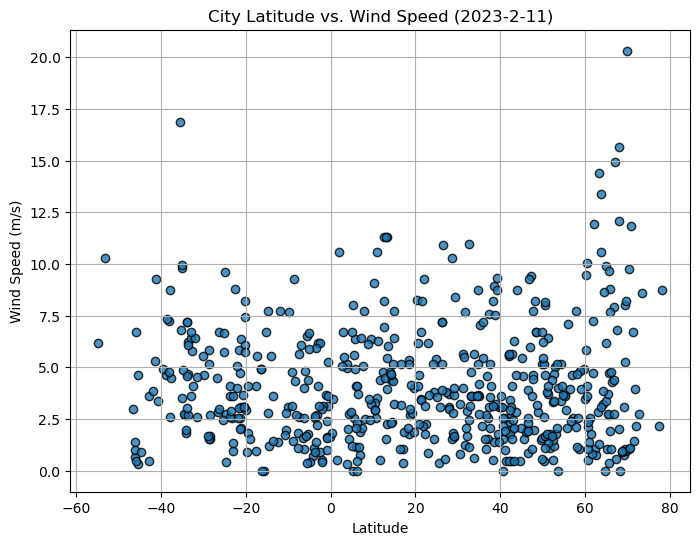

In [42]:
# Build the scatter plots for latitude vs. wind speed
fig4, ax4 = plt.subplots(figsize = (8, 6))
ax4.grid(True)
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label= "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-2-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} (2023-2-11)",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,claveria,18.6074,121.0832,22.97,86,3,2.72,PH,1676227239
4,barrow,71.2906,-156.7887,-26.99,76,0,6.69,US,1676227241
5,kutum,14.2000,24.6667,20.01,18,0,4.40,SD,1676227241
9,saint george,37.1041,-113.5841,10.70,35,0,1.54,US,1676227242
12,meybod,32.2501,54.0166,7.01,50,100,1.69,IR,1676227243


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,26.21,69,40,3.09,MU,1676227239
2,vaini,-21.2000,-175.2000,25.09,94,75,2.06,TO,1676227240
3,puerto leguizamo,-0.1934,-74.7819,32.93,46,55,1.62,CO,1676227240
6,hermanus,-34.4187,19.2345,22.11,77,69,2.69,ZA,1676227241
7,cape town,-33.9258,18.4232,22.16,82,75,7.20,ZA,1676227226


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7339394276750739


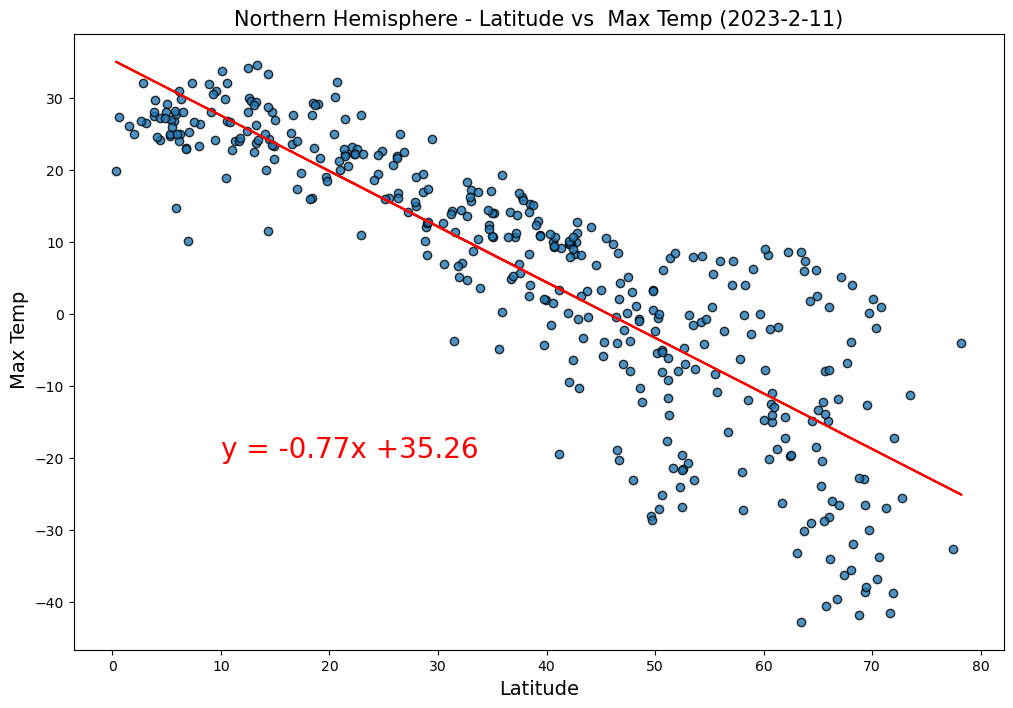

In [63]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", " Max Temp", "Northern", (10,-20))
plt.show()


The r-squared is: 0.2563155451718521


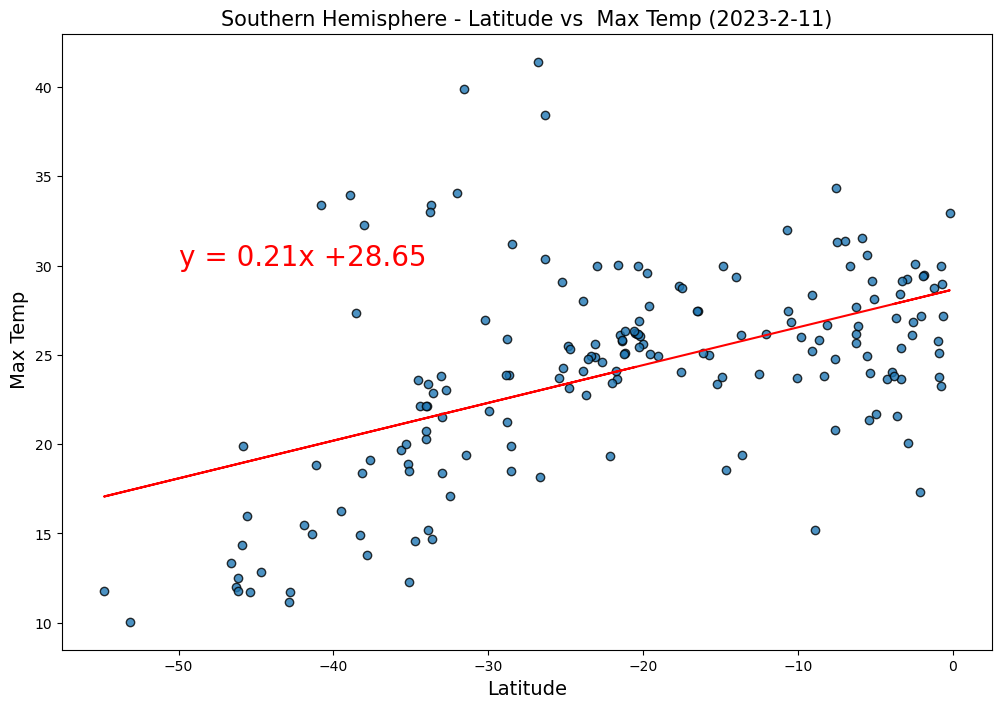

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", " Max Temp", "Southern", (-50,30))
plt.show()

**Discussion about the linear relationship:**  In both graphs you can see strong correlation, as for northern there is a strong negative correalation as to southern it's vice versa. Proving  solid evidence from the graphs that as you move away from the equator the temperature drops. As to when to move closer it rises in Temperature. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.2026641240064708


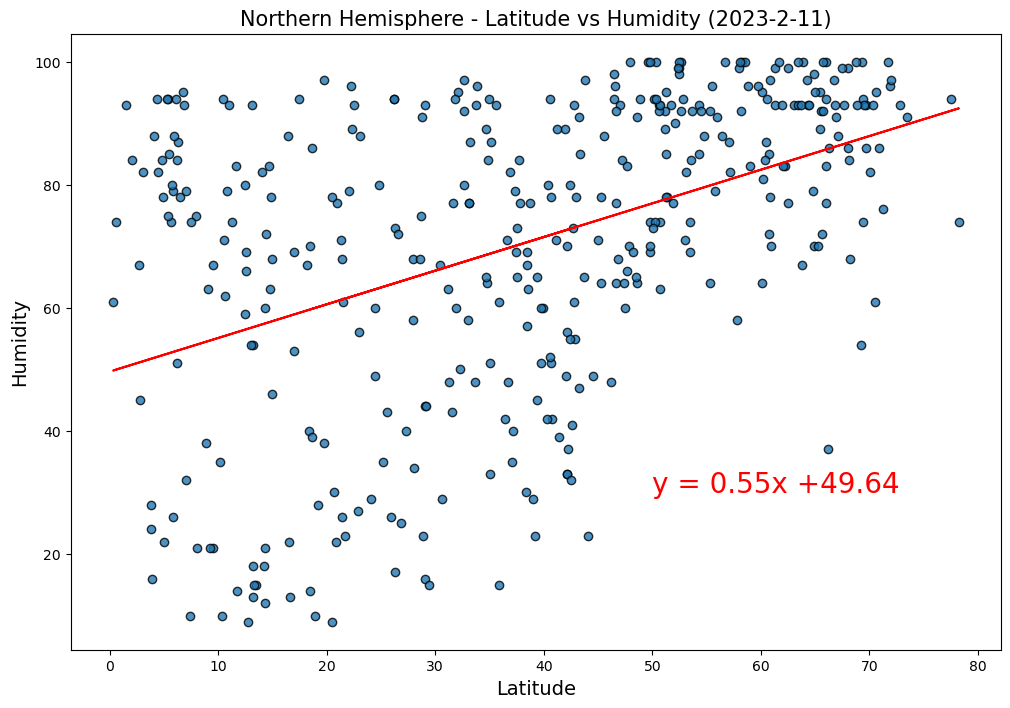

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern", (50,30))
plt.show()

The r-squared is: 0.02739872185585239


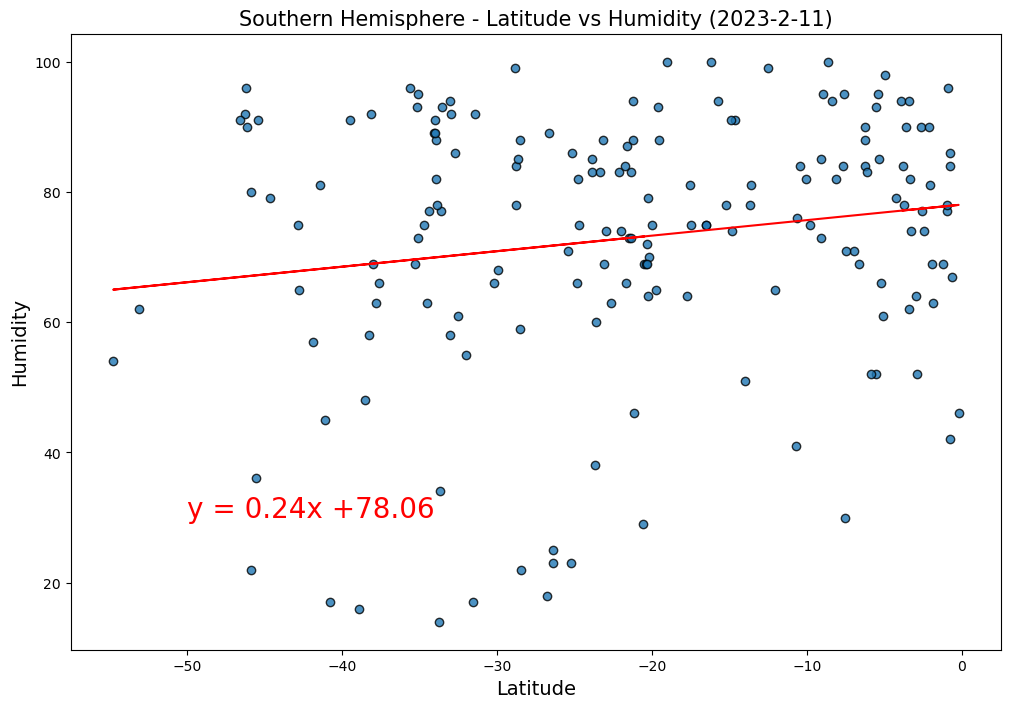

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern", (-50,30))
plt.show()

**Discussion about the linear relationship:** As the latitude increases from the equator do does the humditity in the Northern Hemisphere,proving that is has a weak positive correlation. as to where in the southern hemisphere there is no significant correlation noted.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13821382574088412


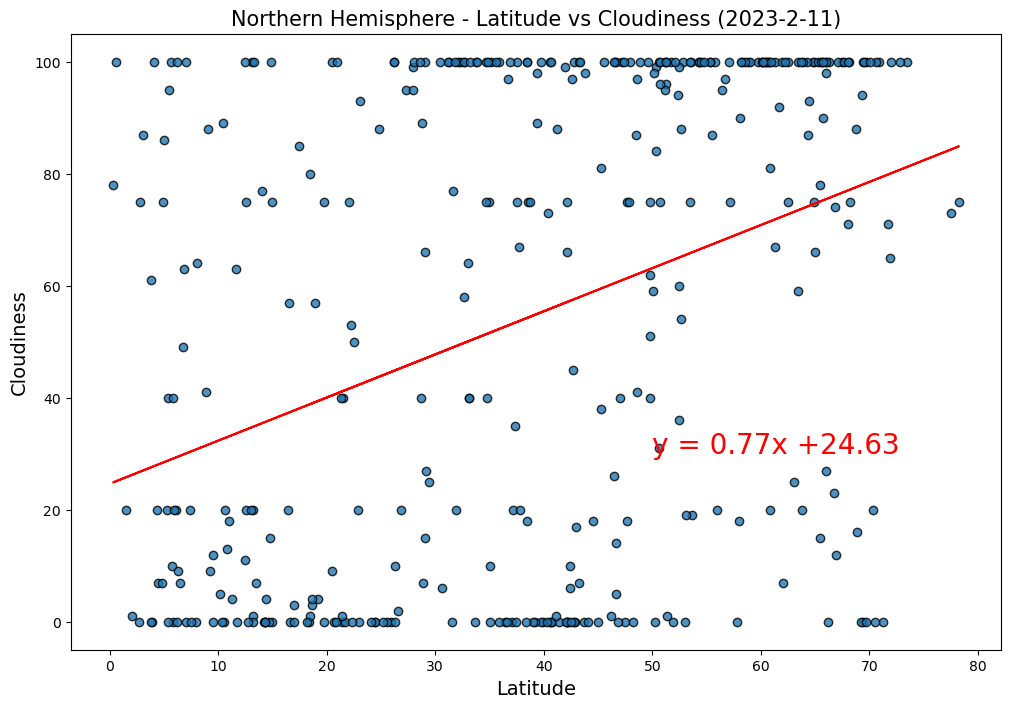

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (50,30))
plt.show()

The r-squared is: 0.10679312091806717


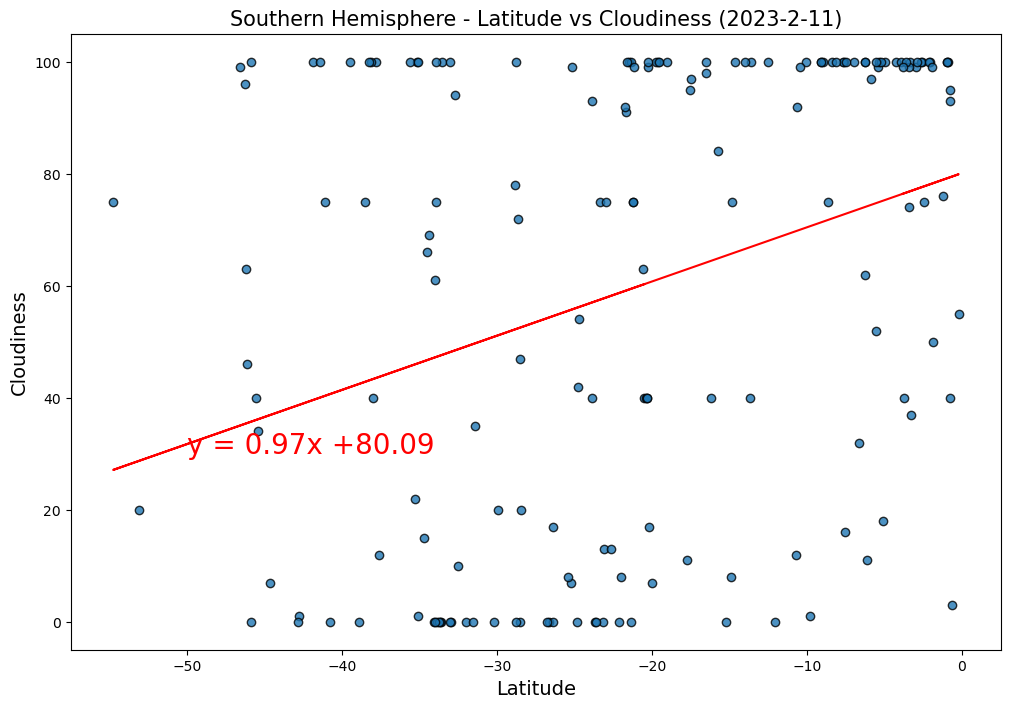

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-50,30))
plt.show()

**Discussion about the linear relationship:** There is no direct correlation in either graph, values are very sporadic

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003496945843212703


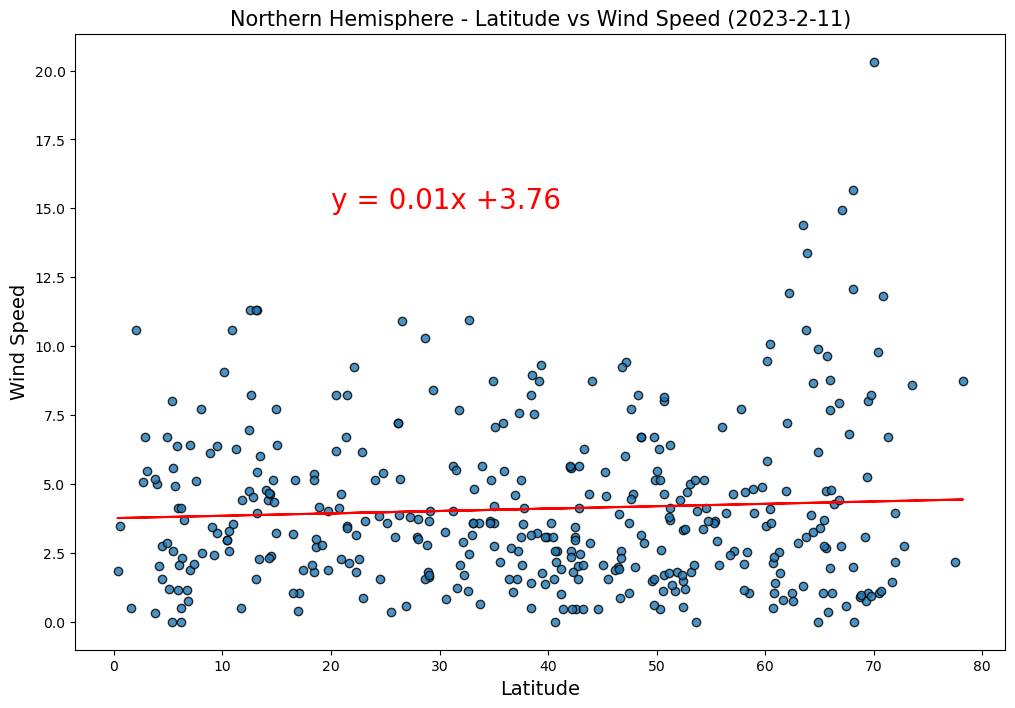

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (20,15))
plt.show()

The r-squared is: 0.05981180257417669


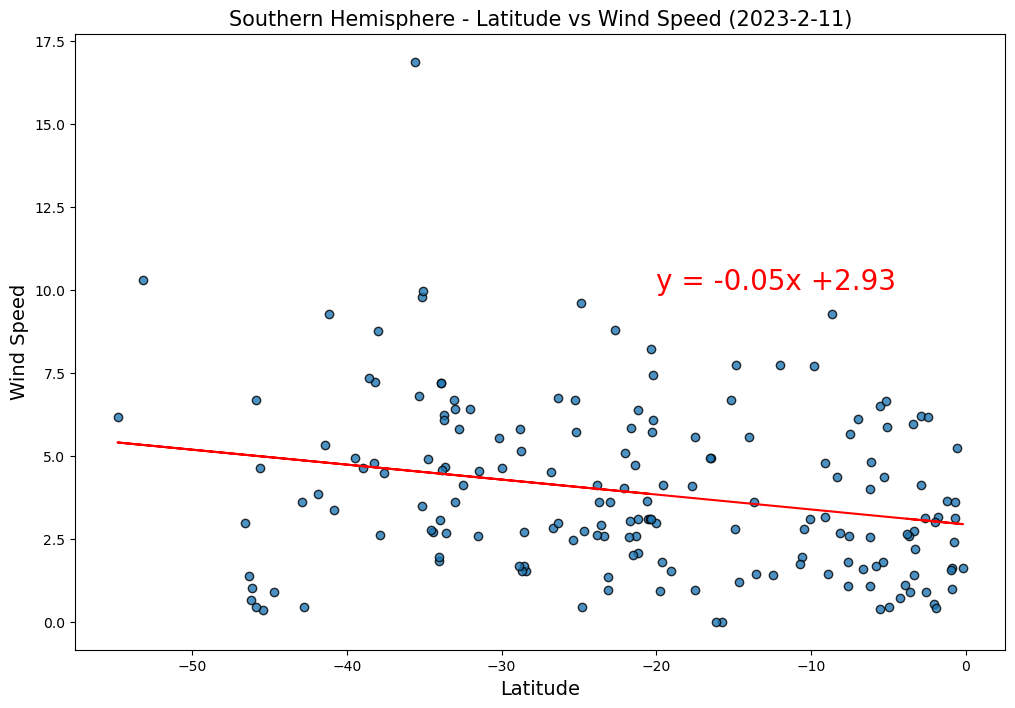

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-20,10))
plt.show()

**Discussion about the linear relationship:**   Although the weak correlation based on the r squared on bothe graph, though if noted on the southern graph a small correlation is seen as you get closer the wind speed begin to drop slighlty as inthe northern graph no correlation is seen.